# DATA 550 Lab 4 - Storytelling and visualizing trends and uncertainties

In this lab we will be using both R and Python,
and for each question you will develop an answer both in `ggplot` and in `Altair`.
Although the `%%R` cell magic makes it convenient for us to do this in the same notebook,
I would still recommend that you use a separate Jupyter Notebook with a dedicated R kernel
or RStudio to develop your R code.
The reasons for this are that autocompletion works better there
and the error messages are easier to understand.
Once you have developed the code for a question
you can paste it into the corresponding R cell here
and make sure it runs and shows up in the exported HTML.

If your `rpy2` does not work,
you can paste in entire cells from an R-kernel including the output plots,
or you can submit a different notebook on GitHub for the R part,
but you must write this in the canvas comments
or next to your repo link in this notebook so that the TAs know when they grade.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Create a GitHub Repo for your group.
      <ul>
          <li>Keep this organized, i.e. with a separate clearly marked folder for each assignment.</li>
    </ul>
  </li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>

  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/folder_path/DATA_550_labX_groupY.</li>
    </ul>
  </li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`</li>
      <li> Convert your notebook to .html format using `File -> Save and Export Notebook As -> HTML`</li>
      <li> Submit and double check that your have submitted the correct file to Canvas </li>
    </ul>
  </li>
</ul>
</div>

# 0. The back story

*(If you don't like the back stories, you can jump down to the heading "The data" Also a disclaimer that I am not a linguist, so this lab is my understanding of some articles I have read, it is likely not perfect.)*

First, I just want to thank you for bringing me back to my senses and stopping my world domination attempt and silly startup idea. I don't know what happen, but I clearly wasn't myself there for a while. Now that you have brought me back to normal, I would like design this lab more similar to the first one and go through a topic that I find intriguing and ponder-worthy.

This time, instead of looking around us, we will look inside. Ever since I arrived on this planet, I have been fascinated about your use of airborn oscillations to transmit information generated by electrical impulses. And the fact that you rely on muscular dexterity for the encoding process as well as passive mechnotransduction for the decoding is truly remarkable (in a primitive sense of course, I guess how your kind can appreciate "the remarkable complexity" of a cave painting). Such a system is clearly a bottleneck in terms of information bandwidth and I am surprised a more direct means of intercranial transmission never evolved here, but from the perspective of my research on less evolved galactic lifeforms I find this fascinating!

After hearing that there are over 7,000 languages spoken across this globe, I am curious whether some of these at least allow for more rapid information transmission than others. The implications of this reach beyond just communication as I have recently learned that you also restrict many of your thoughts to those that can be expressed in words (again, fascinating!). This means that you could literally upgrade your thought throughput by learning a new language. And it could mean that there are groups of people who have access to faster thinking others, just because their language can convey information at a higher rate, what an enormous advantage!

## The data

To aid our exploration of whether some languages are more efficient at conveying information than others, I have received assistance from some of your finest scientists. The data in this lab was published as part of a study in Science Advances in 2019 and made publicly available in their online repository. If you want to read part of the article, I recommend that you do it after attempting to answer the questions (or if you get stuck) since it will give away some of the things that we can otherwise "discover" ourselves. There is also a popular science version of this article publish in The Economist, and I link to both in the optional question at the end.

The scientists have compiled two tables, one with general information on the languages we are studying and one with experimental data where they recorded people speaking a certain text in different languages and noted down how fast they spoke, etc. You can find a description of the columns of both datasets below and they are available both in the student repo and on OneDrive.

---

<center><h3>Languages dataset</h4></center>

| Column              | Description                                       |
|---------------------|---------------------------------------------------|
| iso_lang            | ISO_639-3 language code                           |
| language            | Language name                                     |
| information density | Bits of information per syllable in the language  |
| distinct_syllables  | The number of different syllables in the language |
| continent           | The continent where the language is spoken        |

---

<center><h3>Spoken texts dataset</h4></center>

| Column    | Description                                     |
|-----------|-------------------------------------------------|
| speaker   | Speaker ID                                      |
| iso_lang  | ISO_639-3 language code                         |
| text      | Text ID                                         |
| sex       | The sex of the speaker                          |
| duration  | The number of seconds it took to speak the text |
| syllables | Number of syllables uttered during the speech   |
| age       | The age of the speaker                          |

---

Overall, you will have a bit less direction in this lab to closer simulate a real-life scenario. The questions are a mix of explicit instructions and describing the problem in text, rather than in exact steps. As part of this, there is also a few data wrangling steps needed. As this is an exercise in you interpreting information, it is up to you to clarify what you don't understand with me and the TAs during labs and office hours, just as you would in a real-life collaboration.

In [10]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('colab') # Use 'colab' renderer for running at Google Colab
#alt.data_transformers.enable('data_server')
alt.data_transformers.enable("vegafusion")

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
!pip install "vegafusion[embed]>=1.5.0" vegafusion

In [12]:
!pip install 'vl-convert-python>=1.6.0'

# 1. Language exploration

<p>Let’s first get familiar with potential differences and similarities between the languages in this data set. Clearly a language's information density is going to be important in how quick a speaker can convey information, but I wonder if number of distinct syllabus matter. Let's see if we can see any patterns by organizing the languages by these two variables.</p>

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={accuracy:1,visualization:1}

<h4>Python</h4>
<ol type="1">
<li>Create a scatterplot of the information density of each language versus its number of distinct syllabus. Zoom in to the extent of the data instead of forcing zero to be in the axis.</li>
<li>You will notice that the data appears to cluster in groups in the scatter plot. Can you find a categorical variable in this dataframe that roughly explains this clustering? Color the points in the plot you just created according that variable and add a suitable trend line for each cluster. If there are any points that seem to be outliers, avoid overfitting the trendline to them.</li>
<li>If you think any particular data points deviate from their cluster, label them with their language name in the plot.</li>
</ol>

</div>

In [13]:
import pandas as pd
import altair as alt

languages = pd.read_csv("languages.csv")

label_langs = ["English", "Vietnamese"]

base = alt.Chart(languages).mark_circle(size=80, opacity=0.8).encode(
    x=alt.X(
        "distinct_syllables:Q",
        scale=alt.Scale(zero=False),
        title="Distinct syllables",
    ),
    y=alt.Y(
        "information_density:Q",
        scale=alt.Scale(zero=False),
        title="Information density (bits/syllable)",
    ),
    color=alt.Color("continent:N", title="Continent"),
    tooltip=[
        "language",
        "iso_lang",
        "continent",
        "distinct_syllables",
        "information_density",
    ],
)

trend = base.transform_regression(
    "distinct_syllables", "information_density", groupby=["continent"]
).mark_line(size=2)

labels = alt.Chart(languages[languages["language"].isin(label_langs)]).mark_text(
    align="left", dx=5, dy=-5
).encode(
    x="distinct_syllables:Q",
    y="information_density:Q",
    text="language",
    color="continent:N",
)

plot1 = (base + trend + labels).properties(
    title="Information density vs. distinct syllables"
)
plot1


alt.LayerChart(...)

<div class="alert alert-success" style="color:black">

### Question 1.2
rubric={accuracy:1,visualization:1}

<h4>R</h4>
<ol type="1">
<li>Create a scatterplot of the information density of each language versus its number of distinct syllabus.</li>
<li>You will notice that the data appears to cluster in groups in the scatter plot. Can you find a categorical variable in this dataframe that roughly explains this clustering? Color the points in the plot you just created according that variable and add a suitable trend line for each cluster (optionally including a confidence interval for the fitted line). If there are any points that seem to be outliers, avoid overfitting the trendline to them.</li>
<li>If you think any particular data points deviate from their cluster, label them with their language name in the plot.</li>
</ol>

</div>

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): iso_lang, language, continent
dbl (2): information_density, distinct_syllables

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'


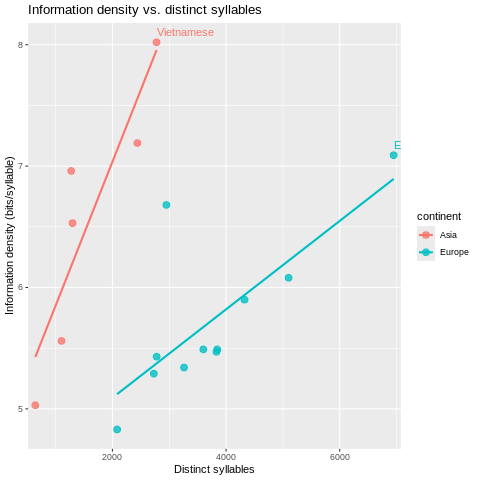

In [14]:
%%R
library(tidyverse)

languages <- read_csv("languages.csv")

label_langs <- c("English", "Vietnamese")

p1 <- ggplot(languages, aes(x = distinct_syllables, y = information_density, color = continent)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_smooth(method = "lm", se = FALSE) +
  geom_text(
    data = subset(languages, language %in% label_langs),
    aes(label = language),
    hjust = 0, vjust = -0.8, show.legend = FALSE
  ) +
  scale_x_continuous(expand = expansion(mult = 0.02)) +
  scale_y_continuous(expand = expansion(mult = 0.05)) +
  labs(
    x = "Distinct syllables",
    y = "Information density (bits/syllable)",
    title = "Information density vs. distinct syllables"
  )

p1


# 2. Speech rate and information density

Hmm... what an intriguing relationship we just revealed... let’s keep these clusters in mind while exploring whether continuing our exploration. The two variables that directly determine the information rate of a language are its information density (bits of information per syllable) and the rate at which it is spoken (syllables per second). A high value in both would indicate a high information rate and efficient communication (a higher number of information bits conveyed per second).

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={reasoning:2,accuracy:3}
    
<h4>Python</h4>
<ol type="1">
<li>While the information density of each language have already been provided to us, we will have to approximate the speech rate (syllables per second) of each language via the <code>spoken_texts</code> dataset. Using this data, calculate the average speech rate per language (for now, treat all entries as individual observations, even if some are read by the same person).</li>
    <li>Create a new column, <code>speech_rate</code>, in the <code>languages</code> data frame that hold these average values. Since the calculated values are not in the same order as the languages in the <code>languages</code> data frame, you cannot simply append it. Instead, you can use the dataframe merge method to join the series of average speech rate values that you just created with the <code>languages</code> dataframe. The language ISO codes could be used as the column to merge on.</li>
<li>Create a scatter plot of the information density versus the speech rate for the <code>languages</code> dataframe. Use the same groupings as in the previous scatter plot you made and add one trend line per group. Label the same points with text labels as in the previous scatterplot. Zoom in to the extent of the data instead of forcing zero to be in the axes.</li>
<li>Write a few sentences under the plot describing the relationship you observe. Based on this plot, do speakers of any particular languages appear to be more efficient at conveying information?</li>
</ol>
    
</div>

In [15]:
import pandas as pd
import altair as alt

languages = pd.read_csv("languages.csv")
spoken = pd.read_csv("spoken-texts.csv")

spoken["speech_rate"] = spoken["syllables"] / spoken["duration"]

speech_rate = spoken.groupby("iso_lang", as_index=False)["speech_rate"].mean()

languages = languages.merge(speech_rate, on="iso_lang", how="left")

label_langs = ["English", "Vietnamese"]

base = alt.Chart(languages).mark_circle(size=80, opacity=0.8).encode(
    x=alt.X(
        "information_density:Q",
        scale=alt.Scale(zero=False),
        title="Information density (bits/syllable)",
    ),
    y=alt.Y(
        "speech_rate:Q",
        scale=alt.Scale(zero=False),
        title="Speech rate (syllables/sec)",
    ),
    color=alt.Color("continent:N", title="Continent"),
    tooltip=[
        "language",
        "iso_lang",
        "continent",
        "information_density",
        "speech_rate",
    ],
)

trend = base.transform_regression(
    "information_density", "speech_rate", groupby=["continent"]
).mark_line(size=2)

labels = alt.Chart(languages[languages["language"].isin(label_langs)]).mark_text(
    align="left", dx=5, dy=-5
).encode(
    x="information_density:Q",
    y="speech_rate:Q",
    text="language",
    color="continent:N",
)

plot2 = (base + trend + labels).properties(
    title="Information density vs. speech rate"
)

plot2


alt.LayerChart(...)

The plot shows a clear trade-off: languages with higher information density tend to be spoken more slowly, resulting in a negative relationship between bits per syllable and syllables per second. Both continents follow a similar downward trend, and the labeled languages (e.g., English and Vietnamese) sit on that trend rather than standing out as uniquely efficient. This suggests that, while individual languages vary, they largely balance density and speed instead of yielding dramatically higher overall efficiency.


<div class="alert alert-success" style="color:black">

### Question 2.2
rubric={reasoning:2,accuracy:3}
    
<h4>R</h4>
<ol type="1">
<li>While the information density of each language have already been provided to us, we will have to approximate the speech rate (syllables per second) of each language via the <code>spoken_texts</code> dataset. Using this data, calculate the average speech rate per language (for now, treat all entries as individual observations, even if some are read by the same person).</li>
    <li>Create a new column, <code>speech_rate</code>, in the <code>languages</code> data frame that hold these average values. Since the calculated values are not in the same order as the languages in the <code>languages</code> data frame, you cannot simply append it. Instead, you need to use the <code>inner_join</code> function to merge the dataframe of average speech rate values that you just created with the <code>languages</code> dataframe. The language ISO codes could be used as the column to join on.
<li>Create a scatter plot of the information density versus the speech rate for the <code>languages</code> dataframe. Use the same groupings as in the previous scatter plot you made and add one trend line per group. Label the same points with text labels as in the previous scatterplot.</li>
</ol>
    
</div>

Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): iso_lang, language, continent
dbl (2): information_density, distinct_syllables

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2288 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): speaker, iso_lang, text, sex
dbl (3): duration, syllables, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'


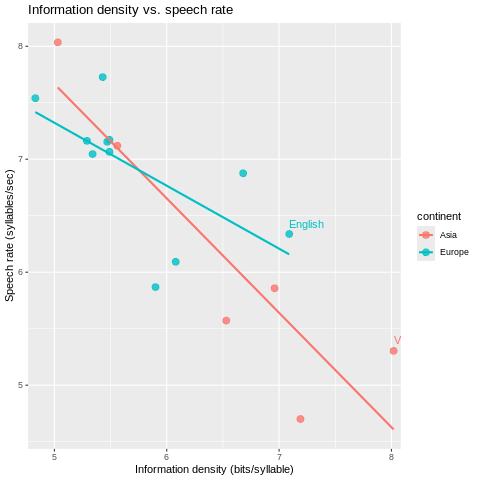

In [16]:
%%R
library(tidyverse)

languages <- read_csv("languages.csv")
spoken <- read_csv("spoken-texts.csv")

speech_rate <- spoken %>%
  mutate(speech_rate = syllables / duration) %>%
  group_by(iso_lang) %>%
  summarise(speech_rate = mean(speech_rate), .groups = "drop")

languages <- languages %>% inner_join(speech_rate, by = "iso_lang")

label_langs <- c("English", "Vietnamese")

p2 <- ggplot(languages, aes(x = information_density, y = speech_rate, color = continent)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_smooth(method = "lm", se = FALSE) +
  geom_text(
    data = subset(languages, language %in% label_langs),
    aes(label = language),
    hjust = 0, vjust = -0.8, show.legend = FALSE
  ) +
  scale_x_continuous(expand = expansion(mult = 0.02)) +
  scale_y_continuous(expand = expansion(mult = 0.05)) +
  labs(
    x = "Information density (bits/syllable)",
    y = "Speech rate (syllables/sec)",
    title = "Information density vs. speech rate"
  )

p2


# 3. Language information rate

Oh those results are very interesting… Hmmm I wonder why it looks like that… Ahhh I see what happened, I forgot to include the severe limitations of the feeble human mind in my hypothesis, oh oops you’re still here, ehh well 🪄*obliviate* to you and let’s carry on.

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={accuracy:3,viz:2}

<h4>Python</h4>
<ol type="1">
<li>It looks like we do not have a language that is high both in information density and speech rate, which could indicate that human minds are not good at processing auditory information beyond a certain rate limit (read more in the article if you're interested). Let’s directly plot the rate at which information is conveyed for all the languages to see if there are at least small differences between them. Combine the appropriate columns to create a new column, <code>information_rate</code>, which holds the amount of information per second conveyed by each speaker.</li>
<li>Create a plot that has the language ISO codes on one axis and the information rate on the other. Plot a graphical representation of either the distribution of data or every single data point. Color this by the same variable as in the previous two scatter plots. Sort the languages in a suitable order.</li>
<li>Include a mark for the mean and the 95% confidence interval on top of the mark you just created above. Color this in a suitable way so that it stands out from the distribution/individual observations created in the previous point.</li>
</ol>
</div>

In [17]:
import pandas as pd
import numpy as np
import altair as alt

languages = pd.read_csv("languages.csv")
spoken = pd.read_csv("spoken-texts.csv")

spoken = spoken.merge(
    languages[["iso_lang", "information_density", "continent"]],
    on="iso_lang",
    how="left",
)

spoken["speech_rate"] = spoken["syllables"] / spoken["duration"]
spoken["information_rate"] = spoken["information_density"] * spoken["speech_rate"]

summary = (
    spoken.groupby("iso_lang", as_index=False)
    .agg(
        mean_rate=("information_rate", "mean"),
        sd_rate=("information_rate", "std"),
        n=("information_rate", "size"),
        continent=("continent", "first"),
    )
)
summary["se"] = summary["sd_rate"] / np.sqrt(summary["n"])
summary["ci_low"] = summary["mean_rate"] - 1.96 * summary["se"]
summary["ci_high"] = summary["mean_rate"] + 1.96 * summary["se"]

order = summary.sort_values("mean_rate")["iso_lang"].tolist()

base = alt.Chart(spoken).mark_boxplot(size=12, opacity=0.3).encode(
    y=alt.Y("iso_lang:N", sort=order, title="Language (ISO)"),
    x=alt.X("information_rate:Q", title="Information rate (bits/sec)"),
    color=alt.Color("continent:N", title="Continent"),
)

ci = alt.Chart(summary).mark_errorbar(color="black").encode(
    y=alt.Y("iso_lang:N", sort=order),
    x=alt.X("ci_low:Q"),
    x2="ci_high:Q",
)

mean_pts = alt.Chart(summary).mark_point(color="black", filled=True, size=50).encode(
    y=alt.Y("iso_lang:N", sort=order),
    x="mean_rate:Q",
)

plot3 = (base + ci + mean_pts).properties(
    title="Information rate by language (mean +/- 95% CI)"
)

plot3


alt.LayerChart(...)

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={accuracy:3,viz:2}
    
<h4>R</h4>
    
<ol type="1">
<li>It looks like we do not have a language that is high both in information density and speech rate, which could indicate that human minds are not good at processing auditory information beyond a certain rate limit (read more in the article if you're interested). Let’s directly plot the rate at which information is conveyed for all the languages to see if there are at least small differences between them. Combine the appropriate columns to create a new column, <code>information_rate</code>, which holds the amount of information per second conveyed by each speaker.</li>
<li>Create a plot that has the language ISO codes on one axis and the information rate on the other. Plot a graphical representation of either the distribution of data or every single data point. Color this by the same variable as in the previous two scatter plots. Sort the languages in a suitable order.</li>
<li>Include a mark for the mean and the 95% confidence interval on top of the marks you just created above. Color this in a suitable way so that it stands out from the distribution/individual observations created in the previous point.</li>
</ol>
</div>

Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): iso_lang, language, continent
dbl (2): information_density, distinct_syllables

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2288 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): speaker, iso_lang, text, sex
dbl (3): duration, syllables, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`height` was translated to `width`.


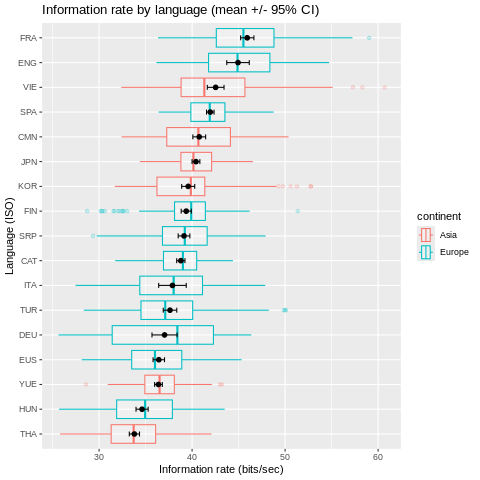

In [19]:
%%R
library(tidyverse)

languages <- read_csv("languages.csv")
spoken <- read_csv("spoken-texts.csv")

spoken_lang <- spoken %>%
  inner_join(languages %>% select(iso_lang, information_density, continent), by = "iso_lang") %>%
  mutate(
    speech_rate = syllables / duration,
    information_rate = information_density * speech_rate
  )

summary <- spoken_lang %>%
  group_by(iso_lang, continent) %>%
  summarise(
    mean_rate = mean(information_rate),
    sd_rate = sd(information_rate),
    n = n(),
    .groups = "drop"
  ) %>%
  mutate(
    se = sd_rate / sqrt(n),
    ci_low = mean_rate - 1.96 * se,
    ci_high = mean_rate + 1.96 * se
  )

order_levels <- summary %>% arrange(mean_rate) %>% pull(iso_lang)
spoken_lang <- spoken_lang %>% mutate(iso_lang = factor(iso_lang, levels = order_levels))
summary <- summary %>% mutate(iso_lang = factor(iso_lang, levels = order_levels))

p3 <- ggplot(spoken_lang, aes(x = information_rate, y = iso_lang, color = continent)) +
  geom_boxplot(alpha = 0.25, outlier.alpha = 0.2) +
  geom_errorbarh(
    data = summary,
    aes(y = iso_lang, xmin = ci_low, xmax = ci_high), # Explicitly define y and xmin/xmax
    height = 0.2,
    color = "black",
    inherit.aes = FALSE # Prevent inheriting `x = information_rate`
  ) +
  geom_point(
    data = summary,
    aes(x = mean_rate),
    color = "black",
    size = 2
  ) +
  labs(
    x = "Information rate (bits/sec)",
    y = "Language (ISO)",
    title = "Information rate by language (mean +/- 95% CI)"
  )

p3

# 4. Tell a story

<div class="alert alert-info" style="color:black">

### Question 4
rubric={reasoning:3}
    
These results are looking pretty promising, now we just need to add a narrative so that it will be easy for others to follow along with what we have done here. Tell a story using the three plots we have created. Build it up according to the principles and examples from this week's required readings. In your story you can refer to the plots as plot A,B, and C. You story should make it clear what the plot is telling us and how it motivates the next plot we're making so that there is a clear story line for the reader to follow as well as a clear take home message (there might be many messages in these plots, so you can choose which to focus on). No need to write an essay here, a succinct paragraph per plot should do it.

</div>

**Plot A.** We first compare information density with the number of distinct syllables. The languages separate into two broad clusters that align with continent, and there is an overall positive association: languages with more distinct syllables tend to pack more information per syllable. A few languages (e.g., English and Vietnamese) sit at the high-density edge of their clusters, which motivates checking whether higher density actually translates to faster communication.

**Plot B.** Plot B reveals a clear trade-off between information density and speech rate: higher-density languages are spoken more slowly, producing a downward trend within each continent. The labeled languages still follow the same pattern, suggesting they are not uniquely efficient in terms of information transmission. This motivates looking directly at information rate (bits per second) to see if any language breaks the trade-off.

**Plot C.** When we compute information rate for each speaker and compare distributions by language, the means and 95% confidence intervals overlap substantially. While there are modest differences between languages, no single continent clearly dominates, indicating that languages tend to balance density and speed to achieve broadly similar overall information throughput.


# 5. Figure composition

<p>Now that we have the individual figures and the story, the final step for us here is to compile our figures into the same layout for presentation.</p>

<div class="alert alert-info" style="color:black">

### Question 5.1
rubric={accuracy:1,viz:2}
    
    
<h4>Python</h4>
<ol type="1">
<li>Assign each of your previous three plots to a variable name (you don’t have to repeat the code down here, you can assign it in the original cell, just make sure you are still outputting the variable at the end of those cells so that the plots still are displayed after each cell).</li>
<li>Arrange the three plots into a layout with the two scatter plots in a column to the left and mean + CI plot to the right. The overall layout should look even, so make the scatterplots about half the height and two thirds of the width of the mean + CI plot.</li>
<li>Set proper titles where you judge it is needed. Show that you know the proper command to save this as a png file on your local computer.</li>
</ol>
    
</div>

In [20]:
# Ensure plot1, plot2, and plot3 are defined in previous cells
plot1 = plot1.properties(width=300, height=200, title="A. Density vs. syllables")
plot2 = plot2.properties(width=300, height=200, title="B. Density vs. speech rate")
plot3 = plot3.properties(width=450, height=400, title="C. Information rate by language")

left = alt.vconcat(plot1, plot2).resolve_scale(color="shared")
final_plot = alt.hconcat(left, plot3).resolve_scale(color="shared")

final_plot

# Save as PNG (requires altair_saver or vl-convert)
# final_plot.save("lab4_story.png")


alt.HConcatChart(...)

<div class="alert alert-success" style="color:black">

### Question 5.2
rubric={accuracy:1,viz:2}
    
<h4>R</h4>
<ol type="1">
<li>Assign each of your previous three plots to a variable name (you don’t have to repeat the code down here, you can assign it in the original cell, just make sure you are still outputting the variable at the end of those cells so that the plot shows up).</li>
<li>Arrange the three plots into a layout with the two scatter plots to the left and mean + CI plot to the right. The overall layout should look even, so make the scatterplots about half the height and two thirds of the width of the mean + CI plot.</li>
<li>Set proper titles where you think it is needed, and remove and superfluous legends. Show that you know the proper command to save this as a png file on your local computer.</li>
</ol>
    
</div>

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`height` was translated to `width`.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/patchwork_1.3.2.tar.gz'
Content type 'application/x-gzip' length 3322521 bytes (3.2 MB)
downloaded 3.2 MB


The downloaded source packages are in
	‘/tmp/RtmpzhyOt9/downloaded_packages’


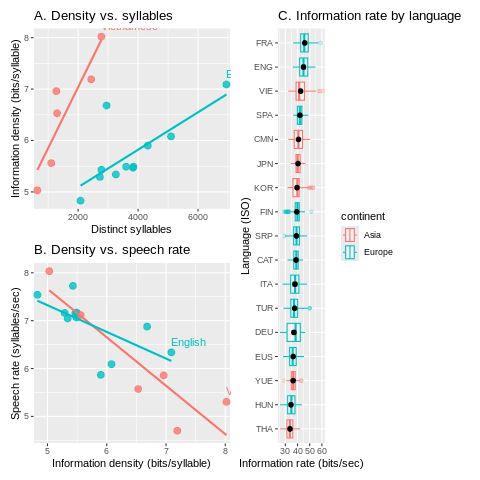

In [22]:
%%R
install.packages("patchwork")
library(patchwork)

p1_l <- p1 + ggtitle("A. Density vs. syllables") + theme(legend.position = "none")
p2_l <- p2 + ggtitle("B. Density vs. speech rate") + theme(legend.position = "none")
p3_l <- p3 + ggtitle("C. Information rate by language")

combined <- (p1_l / p2_l) | p3_l + plot_layout(widths = c(2, 3))
combined

# ggsave("lab4_story.png", combined, width = 12, height = 6, dpi = 300)

---

Thank you, this has certainly been educational. I'll present these results to the intergalactic ministry of traffic and hopefully we can spare earth from the hyperspace bypass this time around... ah shoot, me and my big mouth! Basically there is nothing to worry about, you just keep squabbling amongst each other over lines in the sand and hopefully you wont hear from us again. So long and thanks for all the fish! 🛸🐬

---

# 6. Presenting figures to a general or a technical audience

<p>Below you can see the original figure from <a href="https://www.science.org/doi/10.1126/sciadv.aaw2594">the scientific article in “Science Advances”</a> and the <a href="https://www.economist.com/graphic-detail/2019/09/28/why-are-some-languages-spoken-faster-than-others">simplified version that was published in the Economist</a> (you can create a free account to read the article, no need to pay or use the trial). There is also an R Markdown file for how they did their analysis in the article supplementary materials in case you're interested.</p>

<div class="alert alert-warning" style="color:black">

### Question 6 (Optional)
rubric={reasoning:1.5}

<ol type="1">
<li>Briefly describe how the Economist have simplified the figure from the original scientific publication.</li>
<li>Do you agree with choices made by the Economist? Is there anything you think could have been done differently or additionally, that would have communicated the findings more clearly to a general / popular science audience? This could be based on design choices or your understanding of the data.</li>
</ol>

</div>

## Scientific figure

![image.png](img/article.png)

## Popular science figure

![image.png](img/economist.png)

# 7. Tell your story

<p>Only do this exercise if you feel like you have time over after completing all labs and want additional feedback on your story telling. It will likely take some time and does not give that many points.</p>

<div class="alert alert-warning" style="color:black">

### Question 7 (Optional)
rubric={reasoning:1}

<p>Use the same data to tell another story than the one we told here. Suggestively, you would do some EDA and then use around 2-3 figures with accompanying text to tell a short story about an interesting relationship that you found. I encourage you to try to think of an idea of your own, but if you can't come up with one, I have listed a few ideas below.</p>
    
<details><summary>Suggested ideas to explore</summary>
<ul>
<li>Does the particular text matter for which continent or language was faster? (you could do a paired comparison here)</li>
<li>Group by each speaker’s mean instead of showing all texts (I would personally prefer this to what we did above as I think it shows the variation and sample size more truly, although the means will be similar)</li>
<li>Add language families from the paper and see if there are any patterns among them.</li>
<li>Add additional language features such as tonality and see if there any patterns there.</li>
<li>Plot the different language features on a map.</li>
</ul>
</details>

</div>

In [ ]:
# Optional question not completed.


(Optional) Not completed.


---

A couple of interesting videos on communication and language if you have some spare time this weekend:

- Switching from auditory transfer to electric via implants such as [Kevin Warvick's cyborg-like connection of his nervous system to the internet and his wife's jewelry](https://www.youtube.com/watch?v=Z8HeFNJjuj0&feature=youtu.be&t=822).
- There is evidence that the words we have at our disposal influences how we think. This could mean that certain thought patterns and emotions might be more accessible in languages where they are more easily verbalized, and maybe we would have slightly different thoughts if we knew another language (the reference here is the weak form of the Sapiro-Whorf hypothesis of linguistic relativity, not the strong version). After you are done with the lab, I recommend listening to [this talk by Lera Boroditsky](https://www.youtube.com/watch?v=RKK7wGAYP6k) or watching the movie "Arrival" (although they go a bit far...) if you are interested in learning more about this (it's fun to think about!).

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Convert your notebook to .html format using the `convert_notebook()` function below or by `File -> Export Notebook As... -> Export Notebook to HTML`
3. Run the code `submit()` below to go through an interactive submission process to Canvas.
4. Don't forget to also push your work to GitHub.

In [23]:
from canvasutils.submit import submit, convert_notebook

# Uncomment and run if you want to automatically convert your notebook
# convert_notebook("lab4.ipynb")

# Uncomment and run when ready to submit to Canvas
# submit(course_code=53664, token=False)

ModuleNotFoundError: No module named 'canvasutils'

---

# Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Were there any questions that you particularly liked or disliked?

#Ans: [Questions you liked]

#Ans: [Questions you disliked]